In [28]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("CSV")
Pkg.add("StatPlots")

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


In [29]:
using DataFrames
using Plots
using CSV
using StatPlots
using Statistics

In [32]:
data = CSV.read("results.csv", delim = ';')[1:3]

,Function,Size,Time
,Int64⍰,Float64⍰,Int64⍰
1,1,1.0,3
2,2,1.0,2
3,1,1.0,0
4,2,1.0,0
5,1,1.0,0
6,2,1.0,0
7,1,1.0,0
8,2,1.0,0
9,1,1.0,0


In [38]:
d =  by(data, [1,2]) do df
         DataFrame(time_mean = mean(df[3]), time_std = std(df[3]))
    end

,Function,Size,time_mean,time_std
,Int64⍰,Float64⍰,Float64,Float64
1,1,1.0,0.3,0.948683
2,2,1.0,0.6,0.699206
3,1,8.0,0.3,0.483046
4,2,8.0,0.5,0.527046
5,1,64.0,0.6,0.516398
6,2,64.0,0.6,0.516398
7,1,512.0,2.3,0.483046
8,2,512.0,1.3,0.483046
9,1,4096.0,16.5,2.17307


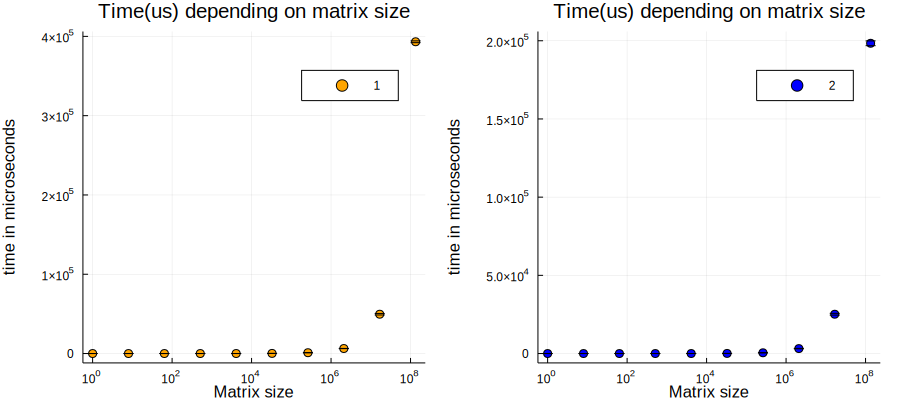

In [45]:
scatter(d[2], d[3], 
        group = d[1], 
        layout = 2, 
        color = [:orange :blue], 
        yerr = d[4], 
        xscale = :log10, 
        dpi = 100, 
        size = (900, 400),
        xlabel = "Matrix size",
        ylabel = "time in microseconds",
        title = "Time(us) depending on matrix size")